## Victoria Borsetti
June 3, 2023

### Description: 
This analysis will use Airbnb data from New York City to determine what aspects of a bnb listing and experience make them the most in-demand. This will include predicting price based on several parameters within the listing and NLP on the description, amenities and reviews to understand what makes a good host and good stay (amenities, location, host response rate, key words used in description, etc.).

### Source:
This data comes from Kaggle at the link: https://www.kaggle.com/datasets/dominoweir/inside-airbnb-nyc?select=listings+2.csv

### Data Details:
There are 2 files of raw data from Kaggle. The first is 88KB and includes 37k Airbnb listings from New York City from September 2022. It contains 74 fields of information including important fields such as text fields (name, description, list of amenities, about the host, bathroom text), images (main picture of lisitng, host thumbnail), categorical (city, neighborhood, type of property, whether the listing is instant bookable), and numerical (listing ID, price, host response rate, latitude, longitude, number of beds, number of bedrooms, number of reviews, average review). The second file is 302MB and includes 986k reviews for each of the listings in the first file. It includes listing ID, review text, the person who reviewed the listing, and the date of review.

# Data Import
Get the data from Kaggle (2 files) into Python

## Import data from Google Drive

In [1]:
import os #needed to check directory
import pandas as pd #import pandas library to convert data to dataframe for easy analysis
import numpy as np #import numpy library for EDA
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # more data visualization and statistics

### Comment

#Importing directly from Google Drive did not work. The result is giving a virus scan warning even though the file is below #the large file limit of 100MB. Many attempts were tried to fix this including changing the permissions on the file, #changing the link that was used, reuploading other versions of the file, etc. This needs more research.

#failed code:
url = 'https://drive.google.com/file/d/1YU91bN5I9mIj75if3T12dVWbxNco95Wd/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
homes = pd.read_csv(path)
homes.head()

## Import data from local
Downloading from Google Drive did not work. Instead, download from Google Drive to local system and then import to Python

In [ ]:
pip install gdown #use gdown package to download from Google Drive

In [2]:
os.getcwdb() # see current directory

b'C:\\Users\\Vic'

In [ ]:
os.chdir(b'C:\Users\Vic\Desktop\UMBC') # change to desired directory to download files

In [ ]:
import gdown #import gdown to kernel

In [ ]:
#gdown syntax to access Google Drive location of file and download to desired location
url = "https://drive.google.com/file/d/1YU91bN5I9mIj75if3T12dVWbxNco95Wd/view?usp=sharing"
output = "listings_all.csv"
gdown.download(url=url, output=output, quiet=False, fuzzy=True)


In [74]:
#define a dataframe called abnb containing all listing data. Specify the datatypes.
abnb = pd.read_csv(r'C:\Users\Vic\Desktop\UMBC\listings_all.csv', 
                   dtype={"listing_url": "string","scrape_id": "float","last_scraped": "string","name": "string",
                    "description": "string","neighborhood_overview": "string","picture_url": "string",
                    "host_id": "float","host_url": "string","host_name": "string","host_since": "string",
                    "host_location": "string","host_about": "string","host_response_time": "string",
                    "host_response_rate": "string","host_acceptance_rate": "string","host_is_superhost": "string",
                    "host_thumbnail_url": "string","host_picture_url": "string","host_neighbourhood": "string",
                    "host_listings_count": "float","host_total_listings_count": "float","host_verifications": "string",                          "host_has_profile_pic": "string","host_identity_verified": "string","neighbourhood": "string",
                    "neighbourhood_cleansed": "string","neighbourhood_group_cleansed": "string","latitude": "float",
                    "longitude": "float","property_type": "string","room_type": "string","accommodates": "float",
                    "bathrooms": "float","bathrooms_text": "string","bedrooms": "float","beds": "float",
                    "amenities": "string","price": "string","minimum_nights": "float","maximum_nights": "float",
                    "minimum_minimum_nights": "float","maximum_minimum_nights": "float","minimum_maximum_nights": "float",
                    "maximum_maximum_nights": "float","minimum_nights_avg_ntm": "float","maximum_nights_avg_ntm": "float",                          "calendar_updated": "string","has_availability": "string","availability_30": "int64",
                    "availability_60": "float","availability_90": "float","availability_365": "float",
                    "calendar_last_scraped": "string","number_of_reviews": "float","number_of_reviews_ltm": "float",
                    "number_of_reviews_l30d": "float","first_review": "string","last_review": "string",
                    "review_scores_rating": "float","review_scores_accuracy": "float",
                    "review_scores_cleanliness": "float","review_scores_checkin": "float",
                    "review_scores_communication": "float","review_scores_location": "float",
                    "review_scores_value": "float","license": "string","instant_bookable": "string",
                    "calculated_host_listings_count": "float","calculated_host_listings_count_entire_homes": "float",
                    "calculated_host_listings_count_private_rooms": "float",
                    "calculated_host_listings_count_shared_rooms": "float","reviews_per_month": "float"})

In [13]:
#observe first 5 lines
abnb.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595.0,https://www.airbnb.com/rooms/2595,2.022060e+13,6/4/2022,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845.0,https://www.airbnb.com/users/show/2845,...,4.79,4.86,4.41,<NA>,f,3.0,3.0,0.0,0.0,0.31
1,5121.0,https://www.airbnb.com/rooms/5121,2.022060e+13,6/4/2022,BlissArtsSpace!,One room available for rent in a 2 bedroom apt...,<NA>,https://a0.muscache.com/pictures/2090980c-b68e...,7356.0,https://www.airbnb.com/users/show/7356,...,4.91,4.47,4.52,<NA>,f,2.0,0.0,2.0,0.0,0.32
2,5136.0,https://www.airbnb.com/rooms/5136,2.022060e+13,6/4/2022,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,<NA>,https://a0.muscache.com/pictures/miso/Hosting-...,7378.0,https://www.airbnb.com/users/show/7378,...,5.00,4.50,5.00,<NA>,f,1.0,1.0,0.0,0.0,0.02
3,5178.0,https://www.airbnb.com/rooms/5178,2.022060e+13,6/4/2022,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",https://a0.muscache.com/pictures/12065/f070997...,8967.0,https://www.airbnb.com/users/show/8967,...,4.44,4.87,4.39,<NA>,f,1.0,0.0,1.0,0.0,3.37
4,5203.0,https://www.airbnb.com/rooms/5203,2.022060e+13,6/3/2022,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,https://a0.muscache.com/pictures/103776/b37157...,7490.0,https://www.airbnb.com/users/show/7490,...,4.95,4.94,4.92,<NA>,f,1.0,0.0,1.0,0.0,0.76


In [ ]:
#Do the same for the Reviews file access Google Drive location of file and download to desired location
url = "https://drive.google.com/file/d/14GwCr7cbbu8_U0CI7uvAvUGQT3wagC6r/view?usp=sharing"
output = "reviews_all.csv"
gdown.download(url=url, output=output, quiet=False, fuzzy=True)

In [5]:
#define a dataframe called reviews containing all listing review data
reviews = pd.read_csv(r'C:\Users\Vic\Desktop\UMBC\reviews_all.csv')

In [6]:
#observe first 5 lines
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits.\r<br/>Nous avons ...
1,2595,19176,2009-12-05,53267,Cate,Great experience.
2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...
3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en..."
4,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...


# Preliminary Data Exploration
Look at the stats for each field and explore means, medians, modes, missing data or strange anamolies. Ensure datatypes are correct and that data looks generally accurate.

## Statistics of each column

In [14]:
#dimensions of the listing dataset
abnb.shape

(37410, 74)

In [15]:
#dimensions of the reviews dataset
reviews.shape

(985674, 6)

In [16]:
# analyze nulls for the listing dataset 
abnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37410 entries, 0 to 37409
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            37410 non-null  float64
 1   listing_url                                   37410 non-null  string 
 2   scrape_id                                     37410 non-null  float64
 3   last_scraped                                  37410 non-null  string 
 4   name                                          37396 non-null  string 
 5   description                                   36523 non-null  string 
 6   neighborhood_overview                         22430 non-null  string 
 7   picture_url                                   37410 non-null  string 
 8   host_id                                       37410 non-null  float64
 9   host_url                                      37410 non-null 

### Comment

Observations:
1. Price, acceptance rate, response rate, and date columns are not in the right data format. These could not be converted on import because they contained non-integer characters($, %) or they are datetime. (See Data Cleansing section for resolution)
2. Important fields like price, longitude, latitude, number of reviews, property type, room type, accommodates and amenities all have data for every listing. This is good.
3. Missing data from average review score, beds, bedrooms, and bathroom text may need to be cleaned up.
4. From the above, we can see that "bathrooms" is an unused field. However, there is a similar field called "bathrooms_text" which is worth looking into. (See Data Cleansing section for resolution)

In [106]:
# analyze nulls for the reviews dataset 
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985674 entries, 0 to 985673
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     985674 non-null  int64 
 1   id             985674 non-null  int64 
 2   date           985674 non-null  object
 3   reviewer_id    985674 non-null  int64 
 4   reviewer_name  985669 non-null  object
 5   comments       985483 non-null  object
dtypes: int64(3), object(3)
memory usage: 45.1+ MB


### Comment

Observations:
1. Not every record in this file has content in "comments". If there isn't content here, it is not useful and needs to be cleaned up. (See Data Cleansing section for resolution)
2. From looking at the first 5 rows of data above, not all reviews are in English. This will affect analysis and will need to be handled.

# Data Cleansing Part 1
From our exploration thus far, make necessary changes to improve the quality of the dataset.

## Change datatypes

In [75]:
#To fix the price column, use a regex to replace the '$' and convert to float
abnb['price'] = abnb['price'].str.replace(',', '', regex=True).str.replace('$', '', regex=True).astype(float)

#Do the same for the response rate and acceptance rate columns for '%'
abnb.host_response_rate = abnb.host_response_rate.str.replace('%', '', regex=True).astype(float)
abnb.host_acceptance_rate = abnb.host_acceptance_rate.str.replace('%', '', regex=True).astype(float)

## Fix bathroom field

In [76]:
# Take a closer look at bathroom_text field
abnb.bathrooms_text.unique()  # show all unique values in this column

<StringArray>
[           '1 bath',                <NA>,         '1.5 baths',
     '1 shared bath',    '1 private bath',  'Shared half-bath',
           '2 baths',           '3 baths',         'Half-bath',
         '2.5 baths',  '1.5 shared baths',    '2 shared baths',
           '0 baths',    '0 shared baths', 'Private half-bath',
         '4.5 baths',         '5.5 baths',  '2.5 shared baths',
         '3.5 baths',        '15.5 baths',           '5 baths',
           '4 baths',    '3 shared baths',    '4 shared baths',
           '6 baths',          '15 baths',  '3.5 shared baths',
  '4.5 shared baths',         '7.5 baths',         '6.5 baths',
           '7 baths',           '8 baths',    '6 shared baths']
Length: 33, dtype: string

### Comment
Most of these entries start with a number. There are 3 that do not: "Shared half-bath", "Private half-bath", and "Half-bath". Let's replace these values with "0.5 shared bath", "0.5 private bath", and "0.5 bath" respectively.
Then, if we split this column by the first space delimiter we can extract the number of bathrooms into a new column.

In [77]:
#replace values
abnb['bathrooms_text'] = abnb['bathrooms_text'].replace(['Shared half-bath', 'Private half-bath', 'Half-bath'], 
                                              ['0.5 shared bath', '0.5 private bath', '0.5 bath'])

In [78]:
#check result
abnb.bathrooms_text.unique()

array(['1 bath', <NA>, '1.5 baths', '1 shared bath', '1 private bath',
       '0.5 shared bath', '2 baths', '3 baths', '0.5 bath', '2.5 baths',
       '1.5 shared baths', '2 shared baths', '0 baths', '0 shared baths',
       '0.5 private bath', '4.5 baths', '5.5 baths', '2.5 shared baths',
       '3.5 baths', '15.5 baths', '5 baths', '4 baths', '3 shared baths',
       '4 shared baths', '6 baths', '15 baths', '3.5 shared baths',
       '4.5 shared baths', '7.5 baths', '6.5 baths', '7 baths', '8 baths',
       '6 shared baths'], dtype=object)

In [79]:
# split the bathrooms_text column into 2 new columns where the delimiter is the *first* space in the text
abnb[['new_bathroom','new_bathroom_type']] = abnb['bathrooms_text'].str.split(' ',n=1, expand=True)

In [86]:
#convert this column into float. Coerce removes the error with converting NAs.
abnb['new_bathroom'] = abnb['new_bathroom'].apply(pd.to_numeric, errors='coerce')

In [87]:
# check new column for bathroom count
abnb.new_bathroom.unique()

array([ 1. ,  nan,  1.5,  0.5,  2. ,  3. ,  2.5,  0. ,  4.5,  5.5,  3.5,
       15.5,  5. ,  4. ,  6. , 15. ,  7.5,  6.5,  7. ,  8. ])

In [89]:
#check datatype
abnb.new_bathroom.dtypes

dtype('float64')

In [66]:
# check new column for bathroom type
abnb.new_bathroom_type.unique()

array(['bath', None, 'baths', 'shared bath', 'private bath',
       'shared baths'], dtype=object)

## Remove blank comment rows in review dataset

In [108]:
#use dropna function to remove all null rows that appear in the comment field of the reviews dataset
reviews.dropna(subset = ['comments'], inplace = True) 

In [109]:
#check result
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985483 entries, 0 to 985673
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     985483 non-null  int64 
 1   id             985483 non-null  int64 
 2   date           985483 non-null  object
 3   reviewer_id    985483 non-null  int64 
 4   reviewer_name  985478 non-null  object
 5   comments       985483 non-null  object
dtypes: int64(3), object(3)
memory usage: 52.6+ MB


## Detect language in review comments

In [94]:
pip install googletrans

  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15734 sha256=52770cc01b2d696c0d72d06a65676d0d8870438b4ae4577420e812a4744ec228
  Stored in directory: c:\users\vic\appdata\local\pip\cache\wheels\0e\ce\9b\d51de1064911d42480ab6b57fc943ee36572441f27546354e2
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
    Uninstalling chardet-4.0.0:
      Successfully uninstalled chardet-4.0.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.2.5 requires pyqt5<5.13, which is not installed.
spyder 4.2.5 requires pyqtwebengine<5.13, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.9.1 requires ruamel-yaml, which is not installed.


### Comment
Translating the text in reviews dataset is not working. For now, I will leave the data how it is.

import googletrans
from googletrans import Translator
translator = Translator()
reviews['translated'] = reviews['comments'].apply(lambda x: translator.translate(x, src='auto', dest='en').text )

# Data Exploration
With our cleaned up data, conduct analysis at a deeper level.

## Standard Stats

In [142]:
# Observe standard statistics of each numerical field for the listings dataset
# This analysis was not done for reviews dataset as data is text-based

pd.set_option('display.max_columns', None) #show all columns in outout. Otherwise, shows truncated list.
print(abnb.describe())

                 id     scrape_id       host_id  host_response_rate  \
count  3.741000e+04  3.741000e+04  3.741000e+04        24200.000000   
mean   6.100385e+16  2.022060e+13  1.237140e+08           92.964628   
std    1.806040e+17  0.000000e+00  1.382397e+08           17.262284   
min    2.595000e+03  2.022060e+13  2.438000e+03            0.000000   
25%    1.470053e+07  2.022060e+13  1.293966e+07           95.000000   
50%    3.484341e+07  2.022060e+13  5.372558e+07          100.000000   
75%    5.018400e+07  2.022060e+13  2.093738e+08          100.000000   
max    6.412410e+17  2.022060e+13  4.623937e+08          100.000000   

       host_acceptance_rate  host_listings_count  host_total_listings_count  \
count          25678.000000         37344.000000               37344.000000   
mean              81.533297            63.811509                  63.811509   
std               26.593832           400.332606                 400.332606   
min                0.000000             0.00

### Comment

Observations:
1. The average host_listings_count is 63 with a standard deviation of 400! This is a lot. Needs validation. Field looks identical to host_total_listings_count which may be able to be deleted. These fields may not be used at all.
2. Longitude and Latitude max and min have small standard deviation which is expected as all of these listings should be in New York City.
3. There is a max of 16 people in the accommodates field which is interesting. There is a max of 42 beds in the beds column! This is worth understanding. There is a max of 15 in bedrooms field - this would be a very large place for NYC, this needs investigation. Min for accommodates is 0 which cannot be correct but may be ignorable.
4. When travelers rate their stays, the category with the largest standard deviation is cleanliness.

## Correlations between numerical columns

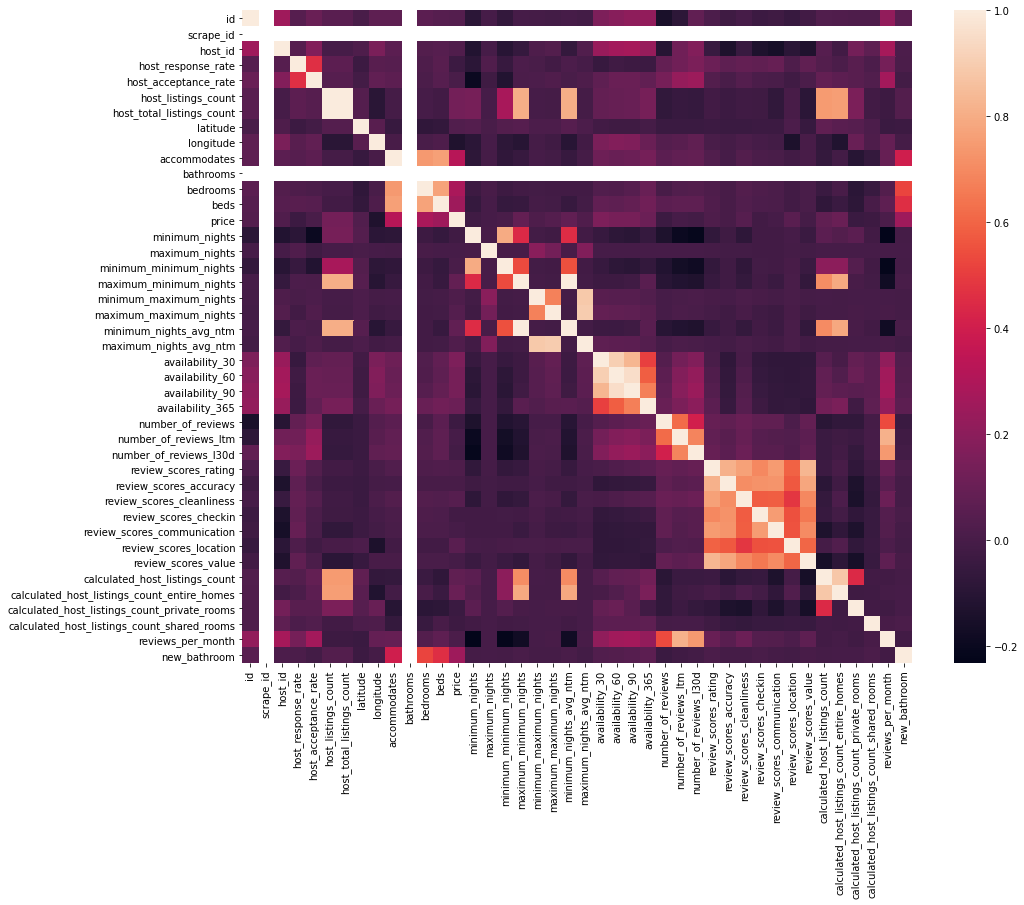

In [112]:
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(abnb.corr(), ax=ax)
plt.show()

### Comment

Observations:
1. Out of all the individual scoring done by a traveler, the highest correlation to the overall score they gave the stay was of value of the listing. This is over accuracy, cleanliness, location, checkin process, and communication.
2. As we would expect, number of bedrooms/beds correlates highly with the number of people the listing can accomodate. This is not terribly helpful.
3. No single field correlates very highly with price

In [134]:
newabnb = abnb[['price', 'review_scores_rating']].copy() #create new dataframe with only 2 columns intended for scatter
newabnb.dropna(axis=0, inplace=True) #code will not run on null values. this will remove them
newabnb.shape #check resulting matrix dimensions

(29461, 2)

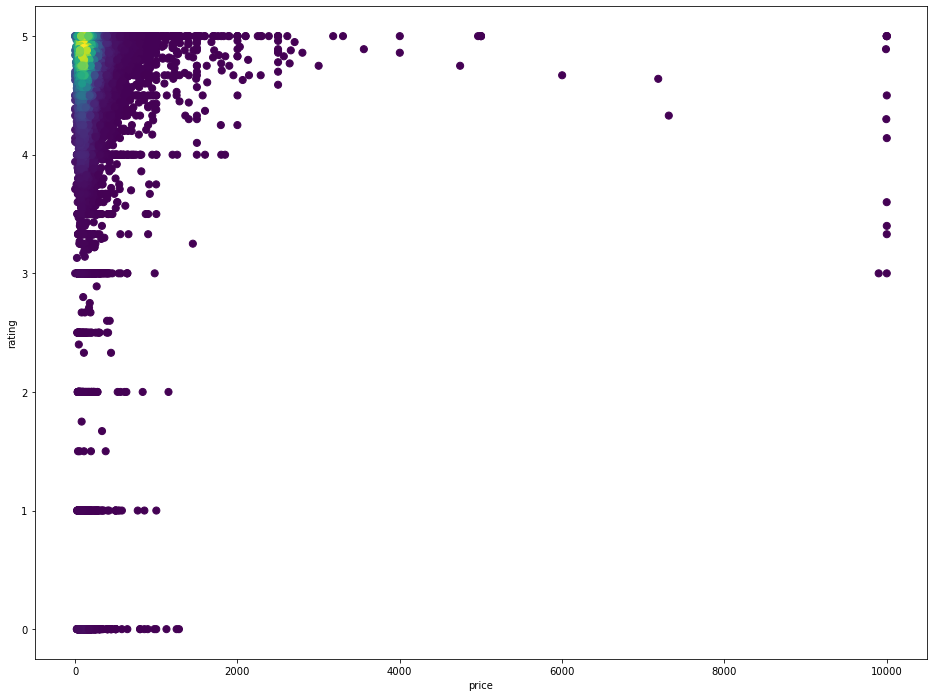

In [173]:
from scipy.stats import gaussian_kde

xy = np.vstack([newabnb.price, newabnb.review_scores_rating])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(newabnb.price, newabnb.review_scores_rating, c=z, s=50)
ax.set_xlabel("price")
ax.set_ylabel("rating")
fig.set_size_inches(16, 12)
plt.show()

### Comment
1. The vast majority of listings are very highly rated and relatively low in price.
2. It is clear that there are many outliers in our dataset. This needs to be cleaned up (See Data Cleansing Part 2).

# Data Cleansing Part 2
This analysis is temping to understand price and rating as it relates to all listings. It is desirable to remove outliers in order to avoid skewed results.

In [169]:
min_thresold_p, max_thresold_p = abnb['price'].quantile([0.10,0.90]) #define 10th and 90th % in price
min_thresold_r, max_thresold_r = abnb['review_scores_rating'].quantile([0.25,0.75]) #define 25th and 75th % in ratings

print("for price, min is: ",min_thresold_p, "max is", max_thresold_p,"for rating, min is: ",min_thresold_r, 
      "max is", max_thresold_r) #print the value that is at 25th and 75th % in price and ratings

for price, min is:  50.0 max is 350.0 for rating, min is:  4.59 max is 5.0


In [178]:
#Filter out below 10% and above 90% for price column.
#Because 75th percentile in rating is also max rating (5.0), we will use the bottom filter only, not the top.
abnb2 = abnb[(abnb.price<max_thresold_p) & (abnb.price>min_thresold_p)]
abnb2 = abnb2[(abnb2.review_scores_rating>min_thresold_r)]

In [179]:
#check - this preserves 18k listings
abnb2.shape

(18343, 76)

In [180]:
#re-plot to see new spread
df3 = abnb2[['price', 'review_scores_rating']].copy() #create new dataframe with only 2 columns intended for scatter
df3.dropna(axis=0, inplace=True) #code will not run on null values. this will remove them
df3.shape #check resulting matrix dimensions

(18343, 2)

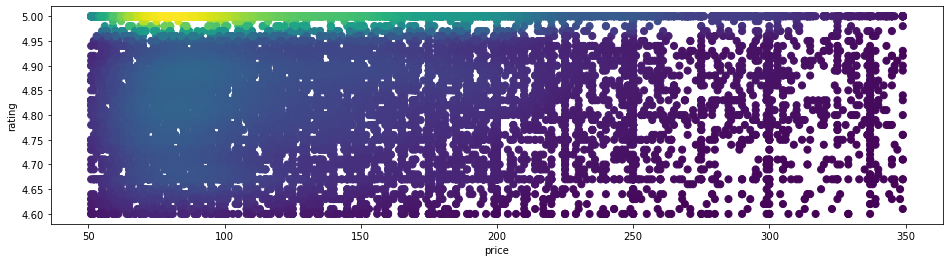

In [184]:
from scipy.stats import gaussian_kde

xy = np.vstack([df3.price, df3.review_scores_rating])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(df3.price, df3.review_scores_rating, c=z, s=50)
ax.set_xlabel("price")
ax.set_ylabel("rating")
fig.set_size_inches(16, 4)
plt.show()

### Comment
It is now much easier to see that there is a listing density for properties that have prices between \\$50-$100 and have ratings 4.6 and above

# Data Exploration Continued

## Histograms of columns

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

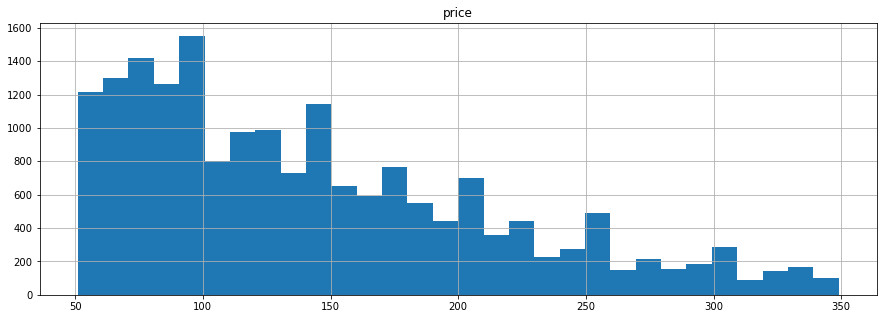

In [185]:
#What is the spread of the daily cost of an NYC Airbnb?
abnb2.hist(column='price', bins = 30,
        figsize=(15, 5))

array([[<AxesSubplot:title={'center':'review_scores_rating'}>]],
      dtype=object)

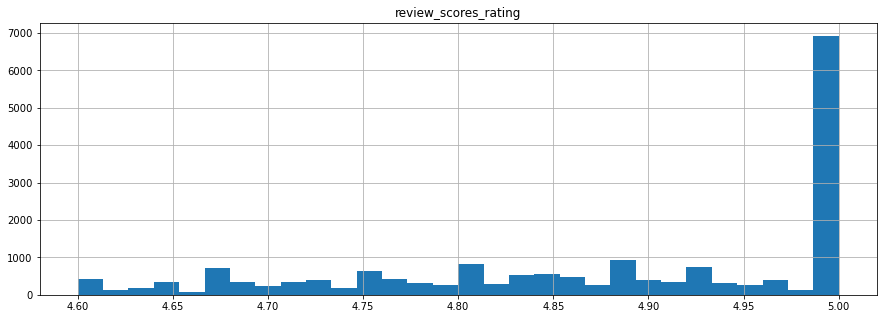

In [187]:
#What is the spread of the ratings of an NYC Airbnb?
abnb2.hist(column='review_scores_rating', bins = 30,
        figsize=(15, 5))

array([[<AxesSubplot:title={'center':'new_bathroom'}>]], dtype=object)

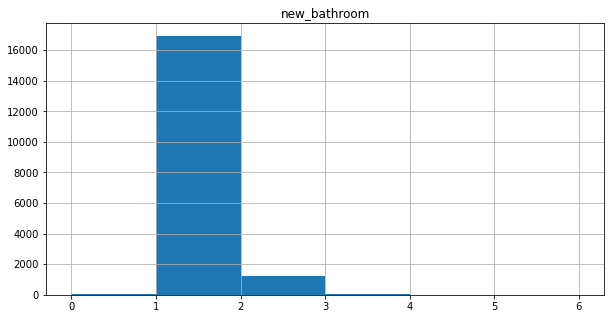

In [192]:
#What is the spread of bathroom count of an NYC Airbnb?
abnb2.hist(column='new_bathroom', bins = 6,
        figsize=(10, 5))

array([[<AxesSubplot:title={'center':'beds'}>]], dtype=object)

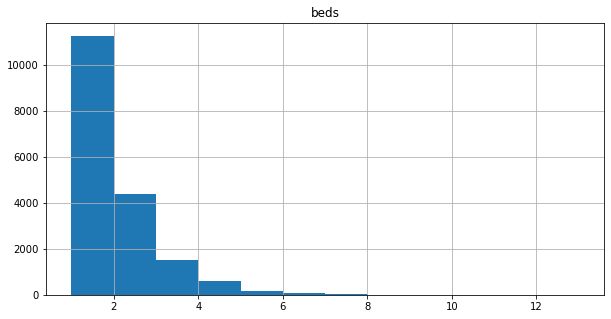

In [191]:
#What is the spread of bedroom count of an NYC Airbnb?
abnb2.hist(column='beds', bins = 12,
        figsize=(10, 5))

### Comment
1. Price sweet spot appears to be relatively low with mode just below \\$100 and ratings appear to be relatively high with mode at 5.0.
2. Most listings only have one to two bathooms and most listings have one to two beds.

This data now appears to be relatively clean and usable. Tackling the language detection in reviews will be next step.